<a href="https://colab.research.google.com/github/JuanDlog/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
!pip install matplotlib

In [4]:
import matplotlib.pyplot as plt

#1. Análisis de facturación



In [5]:
tiendas = ['Tienda-1', 'Tienda-2', 'Tienda-3', 'Tienda-4']
sumaTiendas = []

def sumandoTiendas(tienda):
  precio = tienda['Precio']
  suma = sum(precio)
  sumaTiendas.append(suma)
  return sumaTiendas

sumandoTiendas(tienda)
sumandoTiendas(tienda2)
sumandoTiendas(tienda3)
sumandoTiendas(tienda4)


sumaTiendas


[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

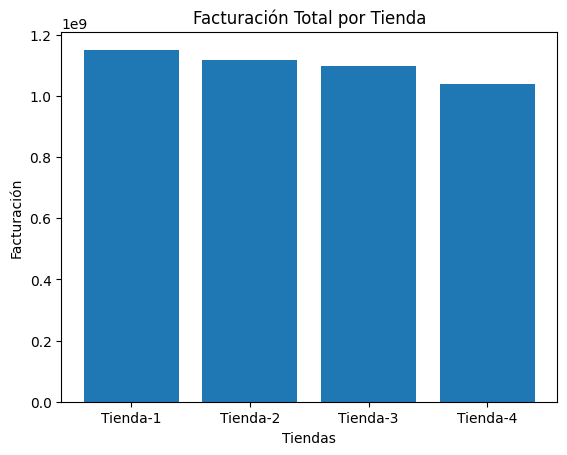

In [6]:
plt.bar(x= tiendas, height= sumaTiendas)
plt.title('Facturación Total por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.show()

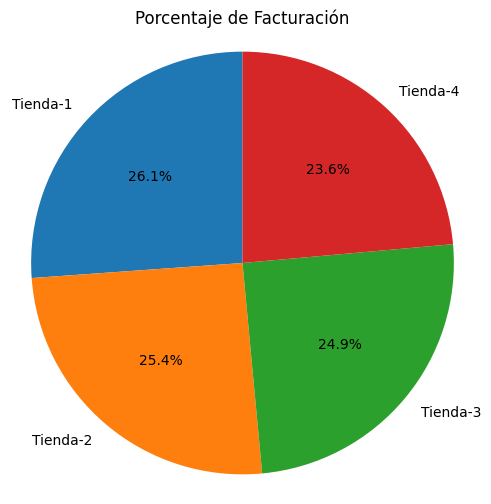

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(sumaTiendas, labels=tiendas, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Facturación')
plt.axis('equal')
plt.show()

# 2. Ventas por categoría

In [7]:
listaCategorias = []

def ventasporCategoria(nombre, tienda):
  conteo = tienda.groupby('Categoría del Producto').size()
  listaCategorias.append((str(nombre), conteo.idxmax(), conteo.max()))

  return listaCategorias

ventasporCategoria('tienda1', tienda)
ventasporCategoria('tienda2', tienda2)
ventasporCategoria('tienda3', tienda3)
ventasporCategoria('tienda4', tienda4)

listaCategorias



[('tienda1', 'Muebles', 465),
 ('tienda2', 'Muebles', 442),
 ('tienda3', 'Muebles', 499),
 ('tienda4', 'Muebles', 480)]

In [8]:
dataCategorias = pd.DataFrame(listaCategorias)

In [9]:
dataCategorias = dataCategorias.rename(columns={0: 'Tienda', 1: 'Categoria', 2: 'Cantidad'})
dataCategorias

dataCategorias['Etiqueta'] = dataCategorias['Tienda'] + '-' + dataCategorias['Categoria']
dataCategorias = dataCategorias.sort_values(by='Cantidad', ascending=True)
dataCategorias

,Tienda,Categoria,Cantidad,Etiqueta
1,tienda2,Muebles,442,tienda2-Muebles
0,tienda1,Muebles,465,tienda1-Muebles
3,tienda4,Muebles,480,tienda4-Muebles
2,tienda3,Muebles,499,tienda3-Muebles


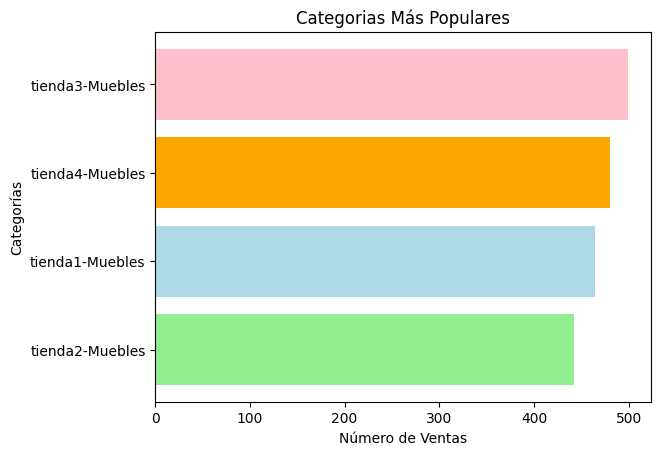

In [10]:
colores = ['lightgreen', 'lightblue', 'orange', 'pink']
plt.barh(dataCategorias['Etiqueta'], dataCategorias['Cantidad'], color=colores)

plt.title('Categorias Más Populares')
plt.xlabel('Número de Ventas')
plt.ylabel('Categorías')
plt.show()


In [25]:
listaCategoriasMenos = []

def ventasporCategoriaMenos(nombre, tienda):
  conteo = tienda.groupby('Categoría del Producto').size()
  listaCategoriasMenos.append((str(nombre), conteo.idxmin(), conteo.min()))

  return listaCategoriasMenos

ventasporCategoriaMenos('tienda1', tienda)
ventasporCategoriaMenos('tienda2', tienda2)
ventasporCategoriaMenos('tienda3', tienda3)
ventasporCategoriaMenos('tienda4', tienda4)

listaCategoriasMenos


[('tienda1', 'Artículos para el hogar', 171),
 ('tienda2', 'Artículos para el hogar', 181),
 ('tienda3', 'Artículos para el hogar', 177),
 ('tienda4', 'Instrumentos musicales', 170)]

In [26]:
dataCategoriasMenos = pd.DataFrame(listaCategoriasMenos)

In [27]:
dataCategoriasMenos = dataCategoriasMenos.rename(columns={0: 'Tienda', 1: 'Categoria', 2: 'Cantidad'})
dataCategoriasMenos

dataCategoriasMenos['Etiqueta'] = dataCategoriasMenos['Tienda'] + '-' + dataCategoriasMenos['Categoria']
dataCategoriasMenos = dataCategoriasMenos.sort_values(by='Cantidad', ascending=True)
dataCategoriasMenos

,Tienda,Categoria,Cantidad,Etiqueta
3,tienda4,Instrumentos musicales,170,tienda4-Instrumentos musicales
0,tienda1,Artículos para el hogar,171,tienda1-Artículos para el hogar
2,tienda3,Artículos para el hogar,177,tienda3-Artículos para el hogar
1,tienda2,Artículos para el hogar,181,tienda2-Artículos para el hogar


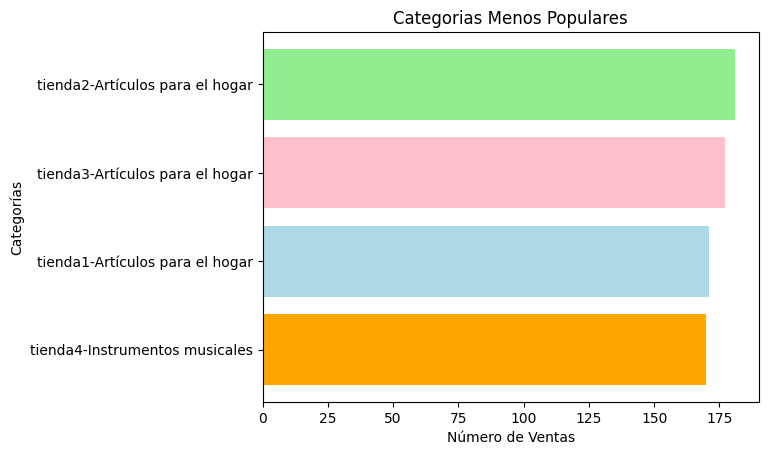

In [31]:
colores = [ 'orange', 'lightblue', 'pink', 'lightgreen']
plt.barh(dataCategoriasMenos['Etiqueta'], dataCategoriasMenos['Cantidad'], color=colores)

plt.title('Categorias Menos Populares')
plt.xlabel('Número de Ventas')
plt.ylabel('Categorías')
plt.show()

# 3. Calificación promedio de la tienda


In [11]:
calificacionesTiendas = []

def calicacionesPromedios(tienda):
  calificaciones = tienda['Calificación']

  promedio = sum(calificaciones)/len(calificaciones)
  calificacionesTiendas.append(promedio)

  return calificacionesTiendas

calicacionesPromedios(tienda)
calicacionesPromedios(tienda2)
calicacionesPromedios(tienda3)
calicacionesPromedios(tienda4)

calificacionesTiendas

[3.976685036032217, 4.037303942348453, 4.048325561678677, 3.9957591178965224]

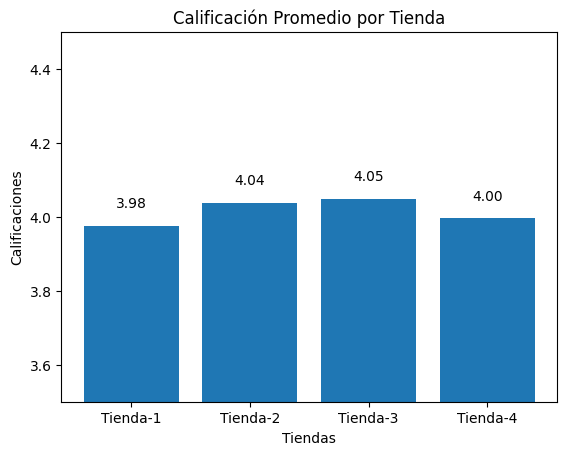

In [20]:
plt.bar(x= tiendas, height= calificacionesTiendas)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificaciones')
plt.ylim(3.5, 4.5)
for i in range(len(tiendas)):
  plt.text(i, calificacionesTiendas[i] + 0.05, f'{calificacionesTiendas[i]:.2f}', ha='center')
plt.show()

# 4. Productos más y menos vendidos

In [13]:
listaVentasMax = []
listaVentasMin = []

def numeroVentas(nombre, tienda):
  conteo = tienda.groupby('Producto').size()
  listaVentasMax.append((str(nombre), conteo.idxmax(), conteo.max()))
  listaVentasMin.append((str(nombre), conteo.idxmin(), conteo.min()))
  return listaVentasMax, listaVentasMin

numeroVentas('tienda1', tienda)
numeroVentas('tienda2', tienda2)
numeroVentas('tienda3', tienda3)
numeroVentas('tienda4', tienda4)

print(listaVentasMax)
print(listaVentasMin)




[('tienda1', 'Armario', 60), ('tienda2', 'Iniciando en programación', 65), ('tienda3', 'Kit de bancas', 57), ('tienda4', 'Cama box', 62)]
[('tienda1', 'Auriculares con micrófono', 33), ('tienda2', 'Juego de mesa', 32), ('tienda3', 'Bloques de construcción', 35), ('tienda4', 'Guitarra eléctrica', 33)]


# 5. Envío promedio por tienda

In [14]:
envioPromedio = []

def enviosTienda(tienda):
  envios = tienda['Costo de envío']

  promedio = sum(envios)/len(envios)
  envioPromedio.append(promedio)

  return envioPromedio

enviosTienda(tienda)
enviosTienda(tienda2)
enviosTienda(tienda3)
enviosTienda(tienda4)

envioPromedio


[26018.60958033065, 25216.235693090293, 24805.680373039424, 23459.457167090754]

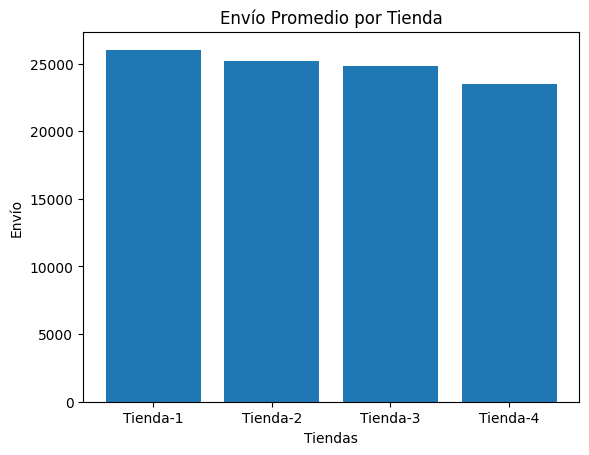

In [15]:
plt.bar(x= tiendas, height= envioPromedio)
plt.title('Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Envío')
plt.show()

# **INFORME FINAL: Recomendación sobre la venta de tienda del Sr. Juan**


#### **Introducción**

En este informe se presenta un análisis comparativo del rendimiento de las cuatro tiendas del Sr. Juan, con el objetivo de determinar cuál de ellas sería la más adecuada para vender. Para ello, se estudiaron múltiples variables clave que permiten evaluar el desempeño comercial y operativo de cada tienda.

* Los puntos analizados fueron:
* Ingresos totales de cada tienda.
* Categorías de productos más y menos vendidas.
* Calificaciones promedio de los clientes.
* Productos más y menos vendidos.
* Costo promedio de envío por tienda.

Durante el análisis, se generaron visualizaciones gráficas que facilitaron la interpretación de los datos y permitieron identificar tendencias, fortalezas y debilidades de cada tienda.

#### **Ingresos Totales**

A través de un gráfico de barras, se evidenció que la **Tienda 4** presenta los ingresos más bajos en comparación con las demás. Esto indica un bajo desempeño en ventas.

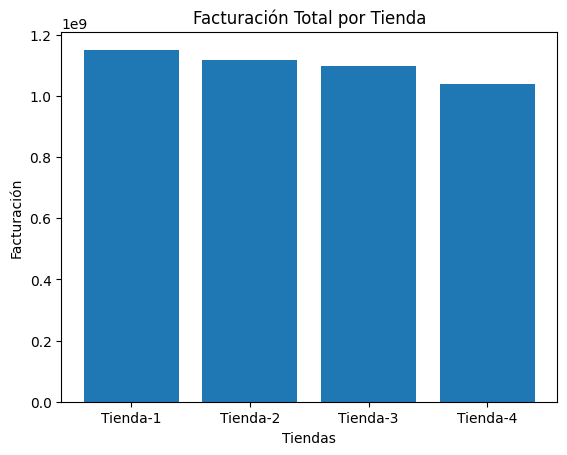

In [21]:
plt.bar(x= tiendas, height= sumaTiendas)
plt.title('Facturación Total por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.show()

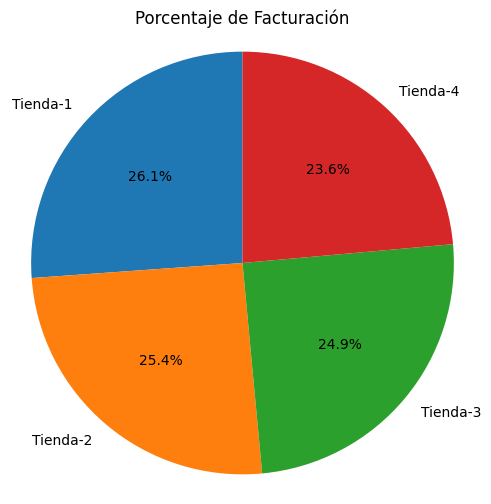

In [22]:
plt.figure(figsize=(6, 6))
plt.pie(sumaTiendas, labels=tiendas, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Facturación')
plt.axis('equal')
plt.show()

#### **Calificaciones Promedios**

En cuanto a la percepción del cliente, la **Tienda 1** obtuvo la calificación promedio más baja, seguida de cerca por la **Tienda 4**. Esto puede reflejar problemas en la atención al cliente, calidad del producto o cumplimiento de expectativas.

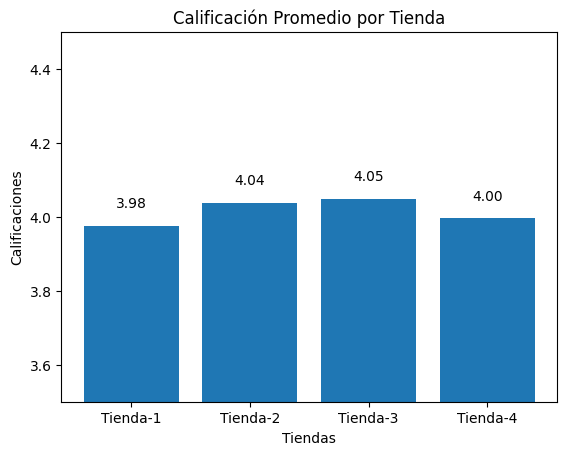

In [23]:
plt.bar(x= tiendas, height= calificacionesTiendas)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificaciones')
plt.ylim(3.5, 4.5)
for i in range(len(tiendas)):
  plt.text(i, calificacionesTiendas[i] + 0.05, f'{calificacionesTiendas[i]:.2f}', ha='center')
plt.show()

#### **Costo Envió Promedio**

Al analizar los costos de envío, se observó que la **Tienda 4**  posee el menor costo promedio. Aunque esto representa una ventaja operativa, no es suficiente para compensar sus bajas ventas y calificaciones.

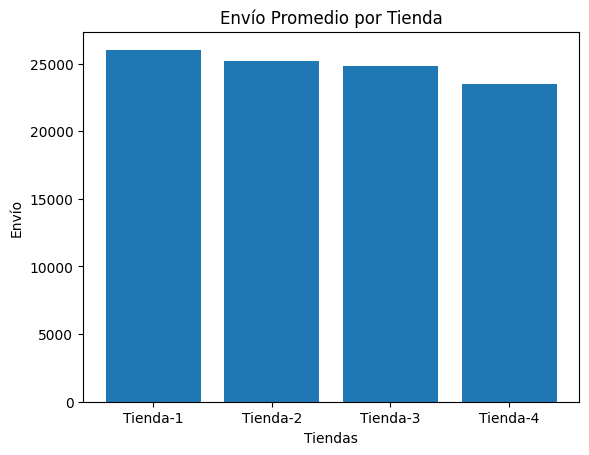

In [32]:
plt.bar(x= tiendas, height= envioPromedio)
plt.title('Envío Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Envío')
plt.show()

#### **Categorías de Productos y Ventas**

Las categorías más y menos vendidas en cada tienda también fueron analizadas. En general, la **Tienda 4** no destacó en ninguna categoría como líder de ventas. Además, algunos de sus productos presentan bajo movimiento, lo cual afecta la rotación de inventario.

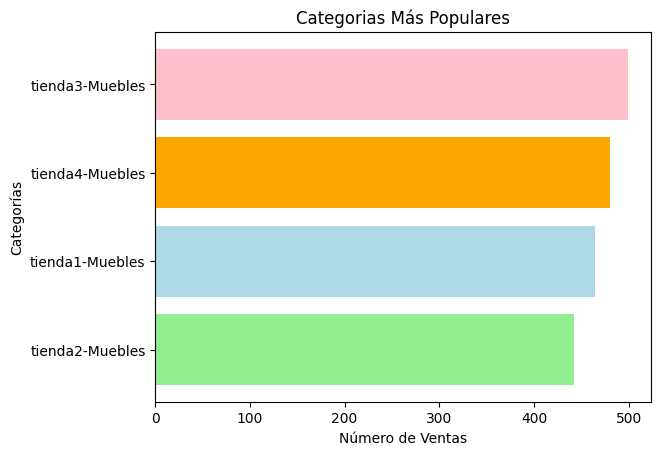

In [33]:
colores = ['lightgreen', 'lightblue', 'orange', 'pink']
plt.barh(dataCategorias['Etiqueta'], dataCategorias['Cantidad'], color=colores)

plt.title('Categorias Más Populares')
plt.xlabel('Número de Ventas')
plt.ylabel('Categorías')
plt.show()

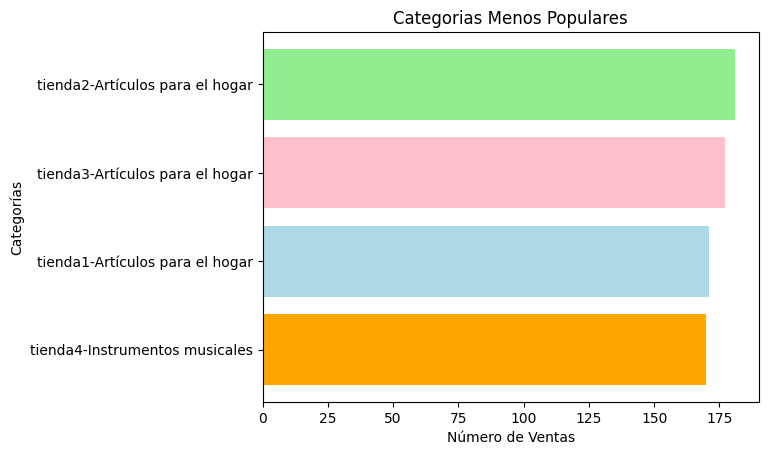

In [34]:
colores = [ 'orange', 'lightblue', 'pink', 'lightgreen']
plt.barh(dataCategoriasMenos['Etiqueta'], dataCategoriasMenos['Cantidad'], color=colores)

plt.title('Categorias Menos Populares')
plt.xlabel('Número de Ventas')
plt.ylabel('Categorías')
plt.show()

#### **Conclusión y Recomendación**

Tras evaluar todos los factores, se concluye que la **Tienda 4** es la opción más adecuada para vender. Aunque presenta un costo de envío más bajo, sus bajos ingresos, calificaciones promedio reducidas, y escasa participación en las categorías más populares hacen que sea menos rentable frente a las otras tiendas.

Se recomienda al Sr. Juan considerar la venta de la **Tienda 4**, ya que liberar ese recurso permitiría concentrar esfuerzos en las tiendas con mayor potencial de crecimiento y mejores resultados operativos.